In [ ]:
import pandas as pd
import numpy as np
import time 

In [ ]:
cabs = pd.read_csv('cab_rides.csv')
weather = pd.read_csv('weather.csv')

In [ ]:
cabs.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


In [ ]:
import datetime as dt
row = weather.iloc[1]
x = dt.datetime.fromtimestamp(row['time_stamp']/1000.0)
x

datetime.datetime(1970, 1, 18, 21, 10, 3, 901000)

In [ ]:
weather['hour'] = weather.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']).hour, axis = 1)
weather['day'] = weather.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']).day, axis = 1)
weather['year'] = weather.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']).year, axis = 1)
weather['month'] = weather.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']).month, axis = 1)
weather['minute'] = weather.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']).minute, axis = 1)
weather['day_of_the_week'] = weather.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']).weekday(), axis = 1)

In [ ]:
weather.iloc[1:20]

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,hour,day,year,month,minute,day_of_the_week
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,23,16,2018,12,45,6
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,23,16,2018,12,45,6
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,23,16,2018,12,45,6
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,23,16,2018,12,45,6
5,42.34,Haymarket Square,1.00,1012.15,0.2068,1545003901,0.77,11.49,23,16,2018,12,45,6
6,42.36,North End,1.00,1012.15,0.2088,1545003901,0.77,11.46,23,16,2018,12,45,6
7,42.21,North Station,1.00,1012.16,0.2069,1545003901,0.77,11.37,23,16,2018,12,45,6
8,42.07,Northeastern University,1.00,1012.12,0.1020,1545003901,0.78,11.28,23,16,2018,12,45,6
9,43.05,South Station,1.00,1012.12,0.1547,1545003901,0.75,11.58,23,16,2018,12,45,6
10,42.09,Theatre District,1.00,1012.13,0.1428,1545003901,0.78,11.41,23,16,2018,12,45,6


In [ ]:
cabs['hour'] = cabs.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']/1000).hour, axis = 1)
cabs['day'] = cabs.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']/1000).day, axis = 1)
cabs['year'] = cabs.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']/1000).year, axis = 1)
cabs['month'] = cabs.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']/1000).month, axis = 1)
cabs['minute'] = cabs.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']/1000).minute, axis = 1)
cabs['day_of_the_week'] = cabs.apply(lambda x : dt.datetime.fromtimestamp(x['time_stamp']/1000).weekday(), axis = 1)

In [ ]:
cabs.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,hour,day,year,month,minute,day_of_the_week
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,9,16,2018,12,30,6
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,2,27,2018,11,0,1
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1,28,2018,11,0,2
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,4,30,2018,11,53,4
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,3,29,2018,11,49,3


(array([ 98., 193., 425., 427., 635., 452., 394., 375., 732., 229.]),
 array([0.45 , 0.504, 0.558, 0.612, 0.666, 0.72 , 0.774, 0.828, 0.882,
        0.936, 0.99 ]),
 <a list of 10 Patch objects>)

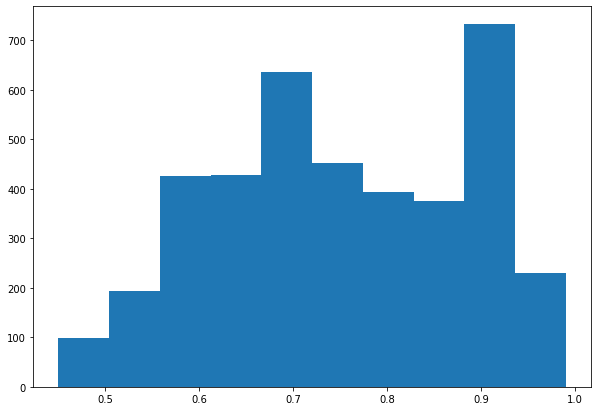

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(weather['humidity'])

In [ ]:
weather.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,hour,day,year,month,minute,day_of_the_week
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25,23,16,2018,12,45,6
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32,23,16,2018,12,45,6
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07,23,16,2018,12,45,6
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09,23,16,2018,12,45,6
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49,23,16,2018,12,45,6


In [ ]:
weather = weather.drop_duplicates(subset = ['month', 'day', 'hour', 'location', 'year'])

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind,hour,day,year,month,minute,day_of_the_week
0,42.42,Back Bay,1.00,1012.14,0.1228,1545003901,0.77,11.25,23,16,2018,12,45,6
1,42.43,Beacon Hill,1.00,1012.15,0.1846,1545003901,0.76,11.32,23,16,2018,12,45,6
2,42.50,Boston University,1.00,1012.15,0.1089,1545003901,0.76,11.07,23,16,2018,12,45,6
3,42.11,Fenway,1.00,1012.13,0.0969,1545003901,0.77,11.09,23,16,2018,12,45,6
4,43.13,Financial District,1.00,1012.14,0.1786,1545003901,0.75,11.49,23,16,2018,12,45,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,44.72,North Station,0.89,1000.69,NaN,1543819974,0.96,1.52,6,3,2018,12,52,0
6272,44.85,Northeastern University,0.88,1000.71,NaN,1543819974,0.96,1.54,6,3,2018,12,52,0
6273,44.82,South Station,0.89,1000.70,NaN,1543819974,0.96,1.54,6,3,2018,12,52,0
6274,44.78,Theatre District,0.89,1000.70,NaN,1543819974,0.96,1.54,6,3,2018,12,52,0


In [ ]:
cabs.rename({'source': 'location'}, inplace = True, axis = 1)

In [ ]:
merged_df = pd.merge(cabs, weather, on = ['hour', 'day', 'year', 'location', 'month'])

In [ ]:
merged_df.rename({'location': 'source'}, inplace = True, axis = 1)

In [ ]:
merged_df.rename({'destination': 'location'}, inplace = True, axis = 1)

In [ ]:
merged_df = pd.merge(merged_df, weather, on = ['hour', 'day', 'location', 'year', 'month'])

In [ ]:
merged_df

,distance,cab_type,time_stamp_x,location,source,price,surge_multiplier,id,product_id,name,...,day_of_the_week_y,temp_y,clouds_y,pressure_y,rain_y,time_stamp,humidity_y,wind_y,minute,day_of_the_week
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.00,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,...,6,38.43,0.22,1022.42,NaN,1544953501,0.76,7.84,45,6
1,0.53,Lyft,1544951109578,North Station,Haymarket Square,27.5,1.00,2aa8d17e-4b13-4200-87db-db3eed73ca6b,lyft_luxsuv,Lux Black XL,...,6,38.43,0.22,1022.42,NaN,1544953501,0.76,7.84,45,6
2,0.49,Uber,1544953210139,North Station,Haymarket Square,26.0,1.00,b2c44c57-4728-441e-83ce-f796a55e6b20,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,...,6,38.43,0.22,1022.42,NaN,1544953501,0.76,7.84,45,6
3,0.42,Lyft,1544952907621,North Station,Haymarket Square,7.0,1.00,53487ea8-dc0e-4c87-bf97-444a48d9cf29,lyft,Lyft,...,6,38.43,0.22,1022.42,NaN,1544953501,0.76,7.84,45,6
4,0.57,Lyft,1544952008337,North Station,Haymarket Square,9.0,1.00,e90ee17e-f8b7-4fcf-99ce-217490780b12,lyft_plus,Lyft XL,...,6,38.43,0.22,1022.42,NaN,1544953501,0.76,7.84,45,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690102,3.39,Uber,1543203647022,North Station,Boston University,10.0,1.00,ba860bcc-eef4-4ed9-98a8-064ebc31d414,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,...,0,40.94,0.89,1014.35,NaN,1543203645,0.92,1.43,40,0
690103,3.39,Uber,1543203647022,North Station,Boston University,18.0,1.00,e4207a18-7ace-4edb-8bd3-7dea8b6ee004,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,...,0,40.94,0.89,1014.35,NaN,1543203645,0.92,1.43,40,0
690104,3.26,Lyft,1543203647696,North Station,Northeastern University,34.0,1.00,ce69e980-c3d1-4317-8d98-0d1be9d058ec,lyft_luxsuv,Lux Black XL,...,0,40.94,0.89,1014.35,NaN,1543203645,0.92,1.43,40,0
690105,4.46,Lyft,1543203646359,Financial District,Boston University,62.5,1.75,1178f52c-9bd4-4b28-a03a-d94e68bfafa3,lyft_lux,Lux Black,...,0,40.95,0.89,1014.35,NaN,1543203645,0.93,1.49,40,0


In [ ]:
merged_df.rename({'location': 'destination'}, inplace = True, axis = 1)

In [ ]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'hour', 'day',
       'year', 'month', 'minute_x', 'day_of_the_week_x', 'temp_x', 'clouds_x',
       'pressure_x', 'rain_x', 'time_stamp_y', 'humidity_x', 'wind_x',
       'minute_y', 'day_of_the_week_y', 'temp_y', 'clouds_y', 'pressure_y',
       'rain_y', 'time_stamp', 'humidity_y', 'wind_y', 'minute',
       'day_of_the_week'],
      dtype='object')

In [ ]:
merged_df.columns

Index(['distance', 'cab_type', 'time_stamp_x', 'destination', 'source',
       'price', 'surge_multiplier', 'id', 'product_id', 'name', 'hour', 'day',
       'year', 'month', 'minute_x', 'day_of_the_week_x', 'temp_x', 'clouds_x',
       'pressure_x', 'rain_x', 'time_stamp_y', 'humidity_x', 'wind_x',
       'minute_y', 'day_of_the_week_y', 'temp_y', 'clouds_y', 'pressure_y',
       'rain_y', 'time_stamp', 'humidity_y', 'wind_y', 'minute',
       'day_of_the_week'],
      dtype='object')

In [ ]:
merged_df.to_csv('Merged_weather_data.csv')